# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data_url = "https://drive.google.com/uc?export=download&id=1OCfBOUyFhu4JfOTL2uDArNdx6XkWQCXA"
df = pd.read_csv(data_url)
df.head()

,City,Latitude,Longitude,Month,Year,Rainfall,Elevation,Climate_Type,Temperature,Humidity
0,Berlin,52.52,13.405,1,2015,71.56,34,Oceanic,19.6,72
1,Berlin,52.52,13.405,2,2015,129.56,34,Oceanic,31.4,88
2,Berlin,52.52,13.405,3,2015,24.58,34,Oceanic,15.4,61
3,Berlin,52.52,13.405,4,2015,177.73,34,Oceanic,15.1,62
4,Berlin,52.52,13.405,5,2015,100.62,34,Oceanic,-3.0,57


# **Dataset Description**

In [3]:
df.shape

(1080, 10)

In [4]:
df.describe()

,Latitude,Longitude,Month,Year,Rainfall,Elevation,Temperature,Humidity
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.00000,1080.000000,1080.000000
mean,51.002410,10.242190,6.500000,2019.000000,99.211787,127.20000,14.724259,65.153704
std,1.576498,2.351316,3.453652,2.583185,57.560449,145.90981,11.433380,20.303775
min,48.135100,6.773500,1.000000,2015.000000,0.000000,6.00000,-5.000000,30.000000
25%,50.110900,8.682100,3.750000,2017.000000,49.500000,37.00000,4.975000,47.000000
50%,51.139050,9.862850,6.500000,2019.000000,99.425000,83.50000,14.850000,66.000000
75%,52.375900,12.373100,9.250000,2021.000000,149.527500,113.00000,24.300000,83.000000
max,53.551100,13.737300,12.000000,2023.000000,199.910000,519.00000,34.900000,99.000000


# **Exploratory Data Analysis**

In [5]:
print(df.columns)


Index(['City', 'Latitude', 'Longitude', 'Month', 'Year', 'Rainfall',
       'Elevation', 'Climate_Type', 'Temperature', 'Humidity'],
      dtype='object')


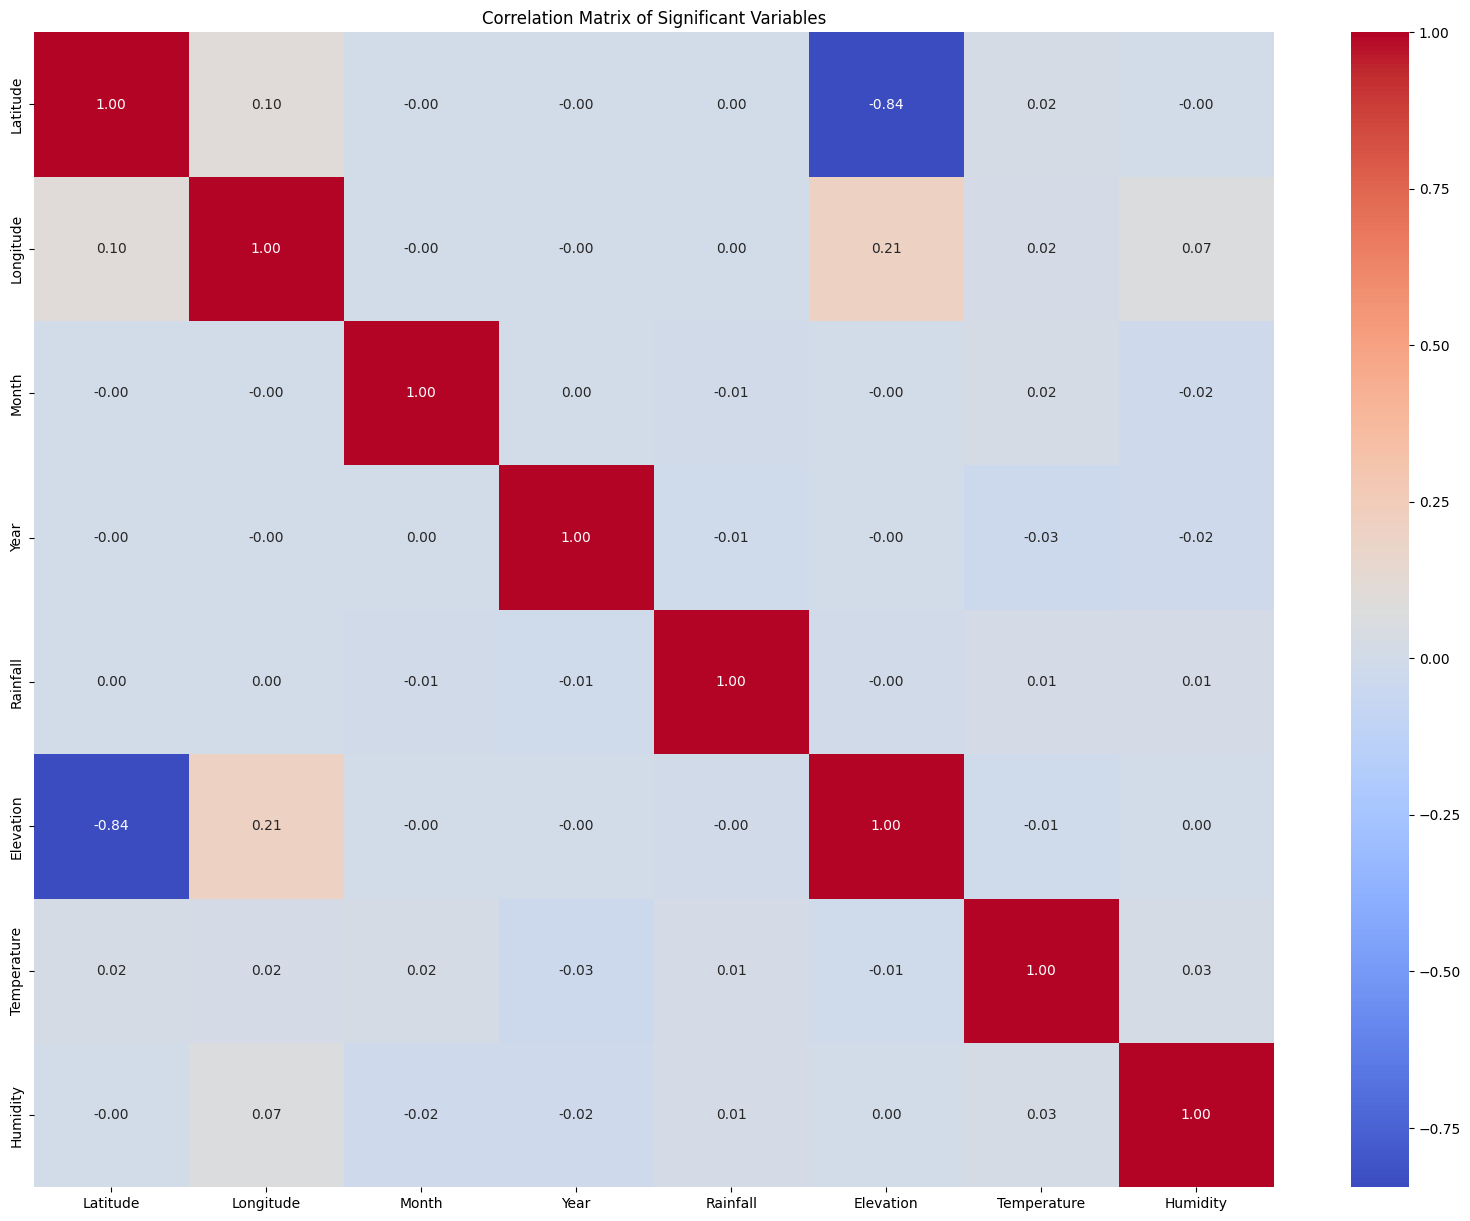

In [7]:
eda_columns = [
    'Latitude',
    'Longitude',
    'Month',
    'Year',
    'Rainfall',
    'Elevation',
    'Temperature',
    'Humidity'
]

# Extract relevant data
eda_data = df[eda_columns]

# Generate summary statistics
summary_stats = eda_data.describe()

# Compute correlation matrix
correlation_matrix = eda_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Significant Variables')
plt.show()

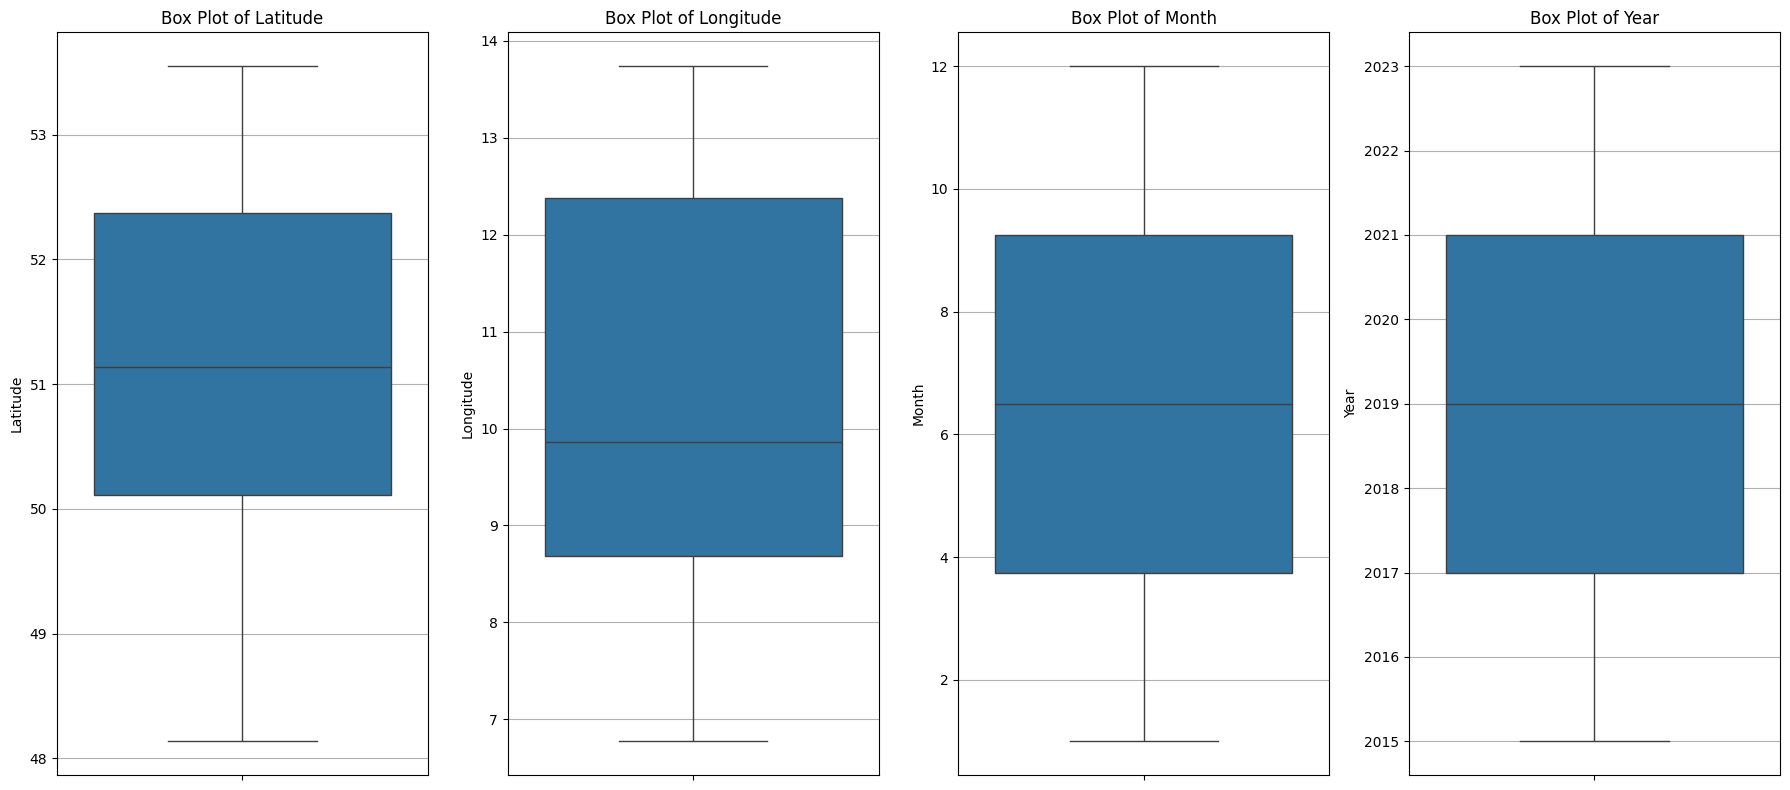

In [8]:
eda_columns = [
    'Latitude',
    'Longitude',
    'Month',
    'Year'
]

plt.figure(figsize=(18, 8))

for i, column in enumerate(eda_columns, 1):
    plt.subplot(1, len(eda_columns), i)

    # Ensure the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.boxplot(y=df[column], flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
    else:
        print(f"Column {column} is not numeric. Skipping box plot.")

    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [9]:
#checking null values
df.isna().sum()

,0
City,0
Latitude,0
Longitude,0
Month,0
Year,0
Rainfall,0
Elevation,0
Climate_Type,0
Temperature,0
Humidity,0


In [10]:
#unique values
df.nunique()

,0
City,10
Latitude,10
Longitude,10
Month,12
Year,9
Rainfall,1038
Elevation,9
Climate_Type,2
Temperature,372
Humidity,70


In [11]:
#duplicate values
df.duplicated().sum()

0

In [94]:
df.dtypes
#types of data


,0
City,object
Latitude,float64
Longitude,float64
Month,int64
Year,int64
Rainfall,float64
Elevation,int64
Climate_Type,object
Temperature,float64
Humidity,int64


In [95]:
#selecting columns with object datatypes
string_columns = df.select_dtypes(include=['object'])
string_columns.head()

,City,Climate_Type
0,Berlin,Oceanic
1,Berlin,Oceanic
2,Berlin,Oceanic
3,Berlin,Oceanic
4,Berlin,Oceanic


In [96]:
df['Climate_Type'].unique()

array(['Oceanic', 'Continental'], dtype=object)

In [97]:
df['Climate_Type'].value_counts()

,count
Climate_Type,
Oceanic,648
Continental,432


In [98]:
climate_type_variables = pd.get_dummies(df['Climate_Type'], dtype=int)
climate_type_variables.head()

,Continental,Oceanic
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [99]:
updated_df = pd.concat([df, climate_type_variables], axis=1)
updated_df.head()

,City,Latitude,Longitude,Month,Year,Rainfall,Elevation,Climate_Type,Temperature,Humidity,Continental,Oceanic
0,Berlin,52.52,13.405,1,2015,71.56,34,Oceanic,19.6,72,0,1
1,Berlin,52.52,13.405,2,2015,129.56,34,Oceanic,31.4,88,0,1
2,Berlin,52.52,13.405,3,2015,24.58,34,Oceanic,15.4,61,0,1
3,Berlin,52.52,13.405,4,2015,177.73,34,Oceanic,15.1,62,0,1
4,Berlin,52.52,13.405,5,2015,100.62,34,Oceanic,-3.0,57,0,1


In [100]:
updated_df.shape

(1080, 12)

In [101]:
updated_df = updated_df.drop('Climate_Type', axis=1)
updated_df.head()

,City,Latitude,Longitude,Month,Year,Rainfall,Elevation,Temperature,Humidity,Continental,Oceanic
0,Berlin,52.52,13.405,1,2015,71.56,34,19.6,72,0,1
1,Berlin,52.52,13.405,2,2015,129.56,34,31.4,88,0,1
2,Berlin,52.52,13.405,3,2015,24.58,34,15.4,61,0,1
3,Berlin,52.52,13.405,4,2015,177.73,34,15.1,62,0,1
4,Berlin,52.52,13.405,5,2015,100.62,34,-3.0,57,0,1


In [102]:
data = updated_df
data.head()

,City,Latitude,Longitude,Month,Year,Rainfall,Elevation,Temperature,Humidity,Continental,Oceanic
0,Berlin,52.52,13.405,1,2015,71.56,34,19.6,72,0,1
1,Berlin,52.52,13.405,2,2015,129.56,34,31.4,88,0,1
2,Berlin,52.52,13.405,3,2015,24.58,34,15.4,61,0,1
3,Berlin,52.52,13.405,4,2015,177.73,34,15.1,62,0,1
4,Berlin,52.52,13.405,5,2015,100.62,34,-3.0,57,0,1


In [103]:
data.shape

(1080, 11)

In [104]:
df['City'].unique()

array(['Berlin', 'Munich', 'Hamburg', 'Cologne', 'Frankfurt', 'Stuttgart',
       'Dusseldorf', 'Dresden', 'Leipzig', 'Hanover'], dtype=object)

In [105]:
df['City'].value_counts()

,count
City,
Berlin,108
Munich,108
Hamburg,108
Cologne,108
Frankfurt,108
Stuttgart,108
Dusseldorf,108
Dresden,108
Leipzig,108


In [115]:
City_variables = pd.get_dummies(df['City'], dtype=int)
City_variables.head()

,Berlin,Cologne,Dresden,Dusseldorf,Frankfurt,Hamburg,Hanover,Leipzig,Munich,Stuttgart
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [116]:
updated_df = pd.concat([df, City_variables], axis=1)
updated_df.head()

,City,Latitude,Longitude,Month,Year,Rainfall,Elevation,Climate_Type,Temperature,Humidity,Berlin,Cologne,Dresden,Dusseldorf,Frankfurt,Hamburg,Hanover,Leipzig,Munich,Stuttgart
0,Berlin,52.52,13.405,1,2015,71.56,34,Oceanic,19.6,72,1,0,0,0,0,0,0,0,0,0
1,Berlin,52.52,13.405,2,2015,129.56,34,Oceanic,31.4,88,1,0,0,0,0,0,0,0,0,0
2,Berlin,52.52,13.405,3,2015,24.58,34,Oceanic,15.4,61,1,0,0,0,0,0,0,0,0,0
3,Berlin,52.52,13.405,4,2015,177.73,34,Oceanic,15.1,62,1,0,0,0,0,0,0,0,0,0
4,Berlin,52.52,13.405,5,2015,100.62,34,Oceanic,-3.0,57,1,0,0,0,0,0,0,0,0,0


In [117]:
updated_df.shape

(1080, 20)

In [119]:
updated_df = updated_df.drop('City', axis=1)
updated_df.head()

,Latitude,Longitude,Month,Year,Rainfall,Elevation,Climate_Type,Temperature,Humidity,Berlin,Cologne,Dresden,Dusseldorf,Frankfurt,Hamburg,Hanover,Leipzig,Munich,Stuttgart
0,52.52,13.405,1,2015,71.56,34,Oceanic,19.6,72,1,0,0,0,0,0,0,0,0,0
1,52.52,13.405,2,2015,129.56,34,Oceanic,31.4,88,1,0,0,0,0,0,0,0,0,0
2,52.52,13.405,3,2015,24.58,34,Oceanic,15.4,61,1,0,0,0,0,0,0,0,0,0
3,52.52,13.405,4,2015,177.73,34,Oceanic,15.1,62,1,0,0,0,0,0,0,0,0,0
4,52.52,13.405,5,2015,100.62,34,Oceanic,-3.0,57,1,0,0,0,0,0,0,0,0,0


In [127]:
updated_df.shape

(1080, 19)

In [128]:
data = updated_df

In [144]:
data = data.drop('Climate_Type', axis=1)

# **Model Implementation**

In [145]:
X = data.drop('Rainfall', axis=1)
y = data['Rainfall']

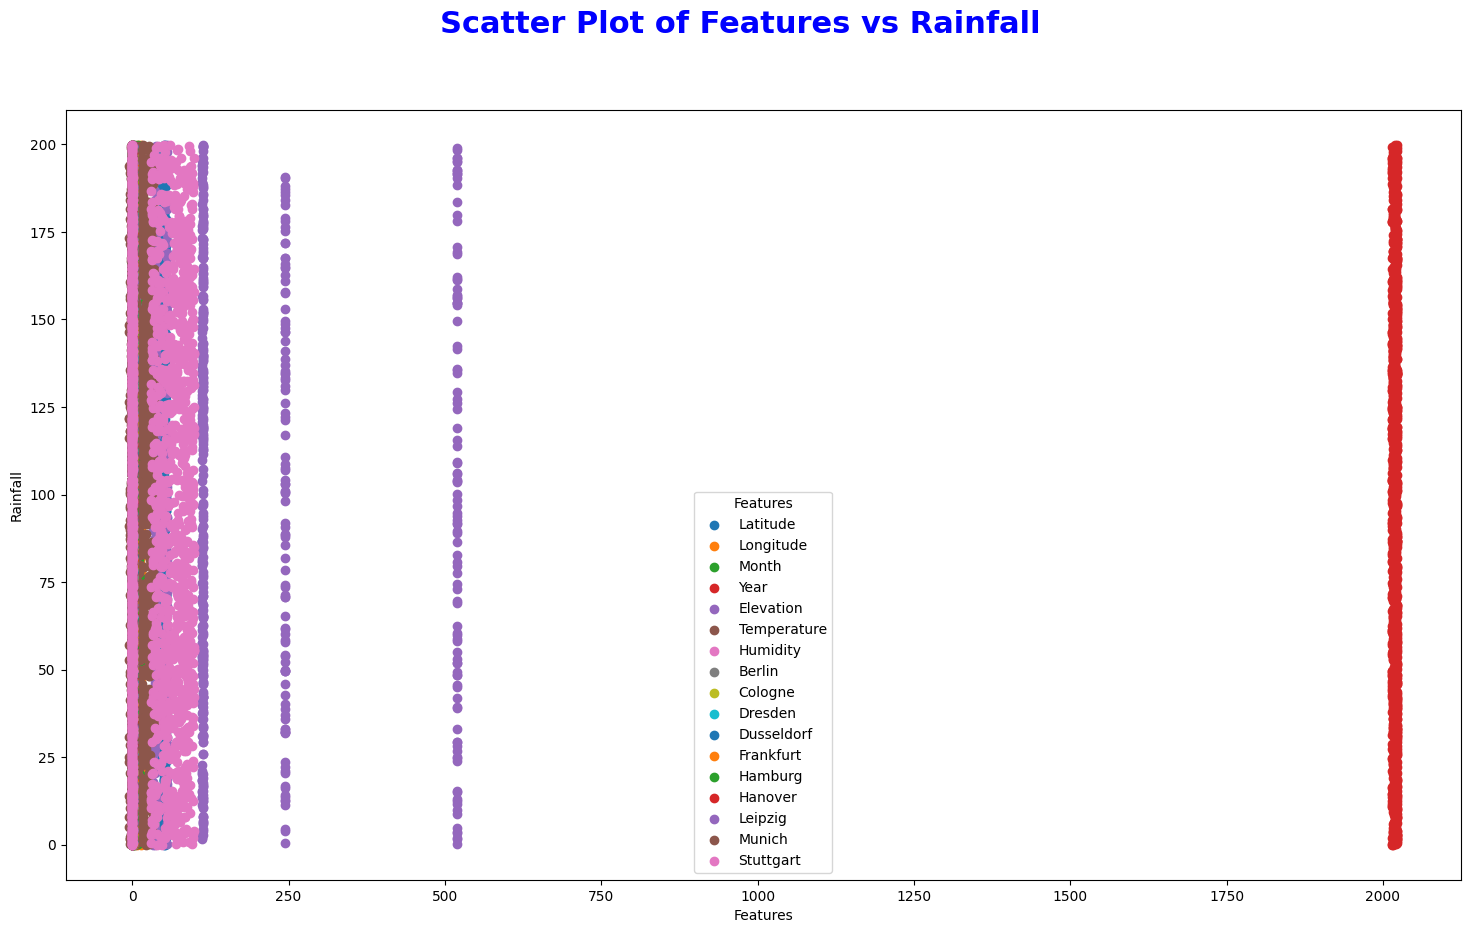

In [146]:
features = X
fig, ax = plt.subplots(figsize=(18, 10))

# Loop over each feature and plot
for feature in features:
    ax.scatter(x=data[feature], y=data["Rainfall"], label=feature)

# Set labels, limits, and ticks
ax.set(xlabel="Features", ylabel="Rainfall")

# Customize the plot
ax.legend(title="Features")

ax.yaxis.get_major_ticks()[0].label1.set_visible(False)

fig.suptitle(t="Scatter Plot of Features vs Rainfall",
             color="blue",
             fontsize=22,
             fontweight="bold")

# Display the plot
plt.show()


In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [149]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((864, 17), (216, 17), (864,), (216,))

In [150]:
print(X_train.dtypes)

Latitude       float64
Longitude      float64
Month            int64
Year             int64
Elevation        int64
Temperature    float64
Humidity         int64
Berlin           int64
Cologne          int64
Dresden          int64
Dusseldorf       int64
Frankfurt        int64
Hamburg          int64
Hanover          int64
Leipzig          int64
Munich           int64
Stuttgart        int64
dtype: object


In [154]:
import tensorflow as tf

# Create an improved model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(17,)),  # Input layer
    tf.keras.layers.Dense(256, activation='relu'),  # Increased neurons
    tf.keras.layers.BatchNormalization(),  # Normalize outputs
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,  # Mean Absolute Error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Adaptive optimizer with higher learning rate
    metrics=["mae"]
)

# Introduce learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * 0.95 ** epoch)

epoch_number = 50

# Train the model
history = model.fit(X_train, y_train,
          epochs=epoch_number,  # Fewer epochs with more efficient learning
          batch_size=32,
          validation_data=(X_test, y_test),
          callbacks=[lr_schedule])  # Use scheduler for better convergence


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 79.8650 - mae: 79.8650 - val_loss: 183.7401 - val_mae: 183.7401 - learning_rate: 0.0100
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.8434 - mae: 53.8434 - val_loss: 58.1250 - val_mae: 58.1250 - learning_rate: 0.0095
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.3175 - mae: 51.3175 - val_loss: 72.5707 - val_mae: 72.5707 - learning_rate: 0.0090
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.7127 - mae: 50.7127 - val_loss: 49.7928 - val_mae: 49.7928 - learning_rate: 0.0086
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.2082 - mae: 51.2082 - val_loss: 49.9392 - val_mae: 49.9392 - learning_rate: 0.0081
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.6509 - mae: 51.6509 - val_loss: 57.1671 - val_mae: 57.1671 - learning_rate: 0.0077
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49.9144 - mae: 49.9144 - val_loss: 53.6879 - val_mae: 53.6879 - learning_ra

In [156]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                     │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,949 (449.02 KB)

 Trainable params: 38,145 (149.00 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 76,292 (298.02 KB)

In [157]:
y_prediction = model.predict(X_test)
y_prediction[:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[111.06413],
       [ 98.92863],
       [104.91719],
       [102.46116],
       [106.5758 ]], dtype=float32)

In [158]:
y_test.head()

,Rainfall
55,33.39
582,88.78
282,173.35
984,11.40
223,181.58


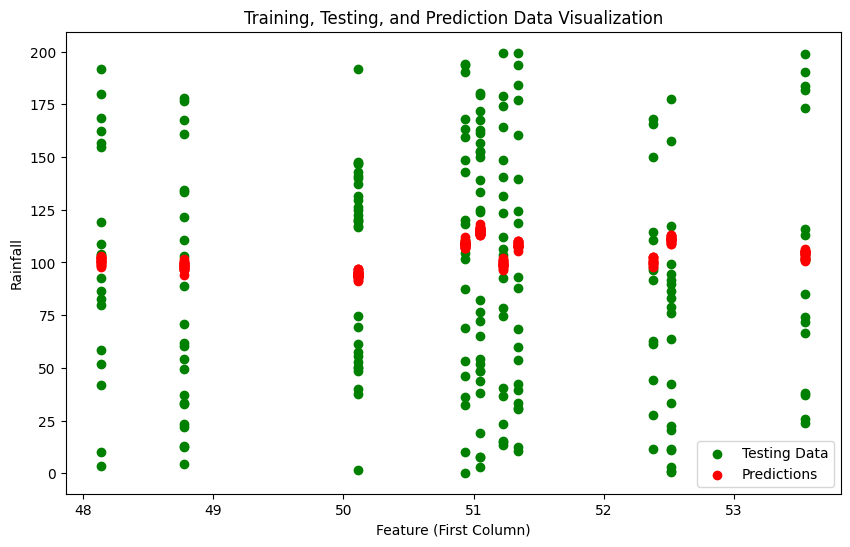

In [159]:
# Use the first feature (column) for plotting
# Convert X_train and X_test to NumPy arrays
x_train_feature = X_train.values[:, 0]  # First feature
x_test_feature = X_test.values[:, 0]   # First feature
 # First feature from test set

# Ensure y_prediction is reshaped if needed
y_prediction = y_prediction.flatten() if len(y_prediction.shape) > 1 else y_prediction

# Plot
plt.figure(figsize=(10, 6))

plt.scatter(x_test_feature, y_test, c='g', label='Testing Data')
plt.scatter(x_test_feature, y_prediction, c='r', label='Predictions')
plt.xlabel("Feature (First Column)")
plt.ylabel("Rainfall")
plt.legend()
plt.title("Training, Testing, and Prediction Data Visualization")
plt.show()


In [160]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.5837 - mae: 49.5837 


[49.19017791748047, 49.19017791748047]

In [161]:
y_prediction.shape

(216,)

In [162]:
y_test.shape

(216,)

In [163]:
# Create a MeanAbsoluteError instance
mae_metric = tf.keras.losses.MeanAbsoluteError()

# Calculate MAE
mae_value = mae_metric(y_test, y_prediction).numpy()

print(f"Mean Absolute Error: {mae_value}")


Mean Absolute Error: 49.19017791748047


In [164]:

mse_metric = tf.keras.losses.MeanSquaredError()


mse_value = mse_metric(y_test, y_prediction).numpy()

print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 3304.240478515625


In [165]:
history.history

{'loss': [67.47725677490234,
  52.14899444580078,
  51.69265365600586,
  51.79347610473633,
  51.64873504638672,
  51.949188232421875,
  51.048404693603516,
  51.08503723144531,
  50.75282287597656,
  50.996822357177734,
  51.53904724121094,
  51.67268371582031,
  51.337039947509766,
  51.06787872314453,
  51.25259017944336,
  51.17192840576172,
  50.912086486816406,
  50.95568084716797,
  50.76601791381836,
  51.47238540649414,
  50.630558013916016,
  50.612606048583984,
  50.680145263671875,
  50.61333084106445,
  50.67353820800781,
  50.85261154174805,
  51.27310562133789,
  50.718360900878906,
  50.70935821533203,
  51.35858917236328,
  50.30325698852539,
  50.67613983154297,
  50.92152786254883,
  50.356048583984375,
  50.50087356567383,
  50.831233978271484,
  50.836666107177734,
  50.69066619873047,
  50.357322692871094,
  49.98643112182617,
  50.35969924926758,
  50.37036895751953,
  51.07340621948242,
  50.34230422973633,
  50.89530944824219,
  50.521297454833984,
  50.4941596

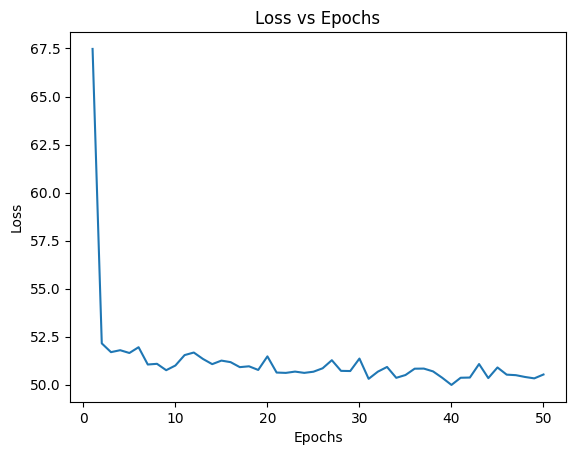

In [166]:
x_range = range(1, epoch_number+1)
loss= history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [167]:
for layer in model.layers:
    weights_and_biases = layer.get_weights()
    if weights_and_biases:
        weights = weights_and_biases[0]
        biases = weights_and_biases[1]
        print(f"\nLayer: {layer.name}")
        print(f"Weights:\n{weights}")
        print(f"Biases:\n{biases}")
    else:
        print(f"\nLayer: {layer.name} has no weights or biases.")



Layer: dense_80
Weights:
[[ 0.11835265 -0.13224581 -0.3296792  ...  0.52769345 -0.09897362
   0.04875158]
 [ 0.08038926  0.06277099  0.19804372 ... -0.4821471   0.13765314
   0.12872112]
 [ 0.04790142 -0.12095252 -0.09540968 ... -0.31228757 -0.0918102
  -0.03531636]
 ...
 [-0.06900959 -0.14168628 -0.09668919 ... -0.5575534  -0.10036431
   0.07338724]
 [ 0.01506904  0.03138703 -0.43139333 ...  0.37755185  0.1028119
  -0.10395217]
 [ 0.0026876  -0.0970289   0.6407408  ... -0.44738314 -0.07655486
   0.10657123]]
Biases:
[ 0.0000000e+00  0.0000000e+00 -2.2265620e-03  0.0000000e+00
  9.3297211e-05  3.5145613e-03  3.5362851e-02  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -1.4564359e-02
  5.8563255e-02  1.2071012e-03  0.0000000e+00  6.7638136e-02
  1.5964268e-01 -7.5398287e-04  4.7590248e-02  6.7651477e-03
  0.0000000e+00  5.3590629e-02  0.0000000e+00  0.0000000e+00
  9.8506592e-02  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -5.3111743e-02 -2.7704316e-03  0.0000000e+00  2.